# Netflix: Data analysis and visualization

## by Liberty Rodriguez

## Project  Explanation

The Netflix dataset is from a video streaming service company. It contains the following columns:

- Show id: Unique identifier for each row starting with "s1"
- Type: identifies whether it's a show or a movie
- Title: The name of the show or movie
- Director: The director(s) of the show or movie
- Cast: The cast of the show or movie
- Country: Country where the show or movie was produced
- Date Added: The date the show or movie was available for streaming on Netflix
- Release Year: The year the show or movie was first released
- Rating: The rating of the show or movie
- Duration: The number of seasons (if a show) or duration in minutes (if a movie)
- Listed In: Genre(s) of show or movie
- Description: A short summary description

By analysing the dataset, we will find insights about what content is available on the Netflix platform and be able to inform potential consumers wondering if this is the right service for them.

## The goal of the project

Analyze and find connections or paterns about the type of content available on Netflix. 

# Part 1: Data Preprocessing

## Import Libraries

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as py
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.colors
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Load the dataset

In [2]:
# creating the dataframe df
df = pd.read_csv('netflix_titles.csv')

## Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
for i in df.columns:
    print(f'{i} contains {df[i].nunique()} unique values')

show_id contains 8807 unique values
type contains 2 unique values
title contains 8807 unique values
director contains 4528 unique values
cast contains 7692 unique values
country contains 748 unique values
date_added contains 1767 unique values
release_year contains 74 unique values
rating contains 17 unique values
duration contains 220 unique values
listed_in contains 514 unique values
description contains 8775 unique values


In [7]:
print(f'The earliest release year is: {df.release_year.min()}\nThe most recent release year is: {df.release_year.max()}')

The earliest release year is: 1925
The most recent release year is: 2021


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

# Assessing Data before Cleaning

### What I found out:

- The dataset contains 8807 rows and 12 columns
- Release year is the only numeric column
- Date added contains numbers and letters
- Unique Values:
    - show_id contains 8807 unique values
    - type contains 2 unique values
    - title contains 8807 unique values
    - director contains 4528 unique values
    - cast contains 7692 unique values
    - country contains 748 unique values
    - date_added contains 1767 unique values
    - release_year contains 74 unique values
    - rating contains 17 unique values
    - duration contains 220 unique values
    - listed_in contains 514 unique values
    - description contains 8775 unique values
- There are null values in the following categories: director, cast, country, date_added, rating, and duration 

# Part 2: Data Cleaning

In [70]:
df=df.fillna('Not specified')

# Part 3: Visualizations

In [25]:
movies = (df['type'] == 'Movie')
shows = (df['type'] == 'TV Show')

# How many movies/shows?

In [57]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

C:\Users\Liberty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


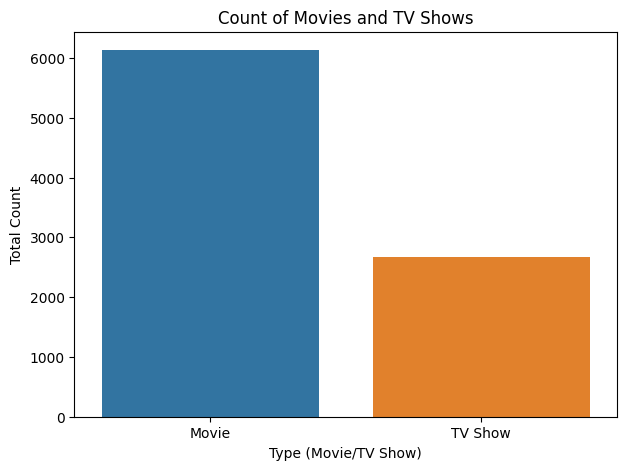

In [58]:
plt.figure(figsize=(7,5))
g = sns.countplot(df.type);
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

# Percent movies/shows?

In [15]:
df['type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#gives me percent

Movie      69.6%
TV Show    30.4%
Name: type, dtype: object

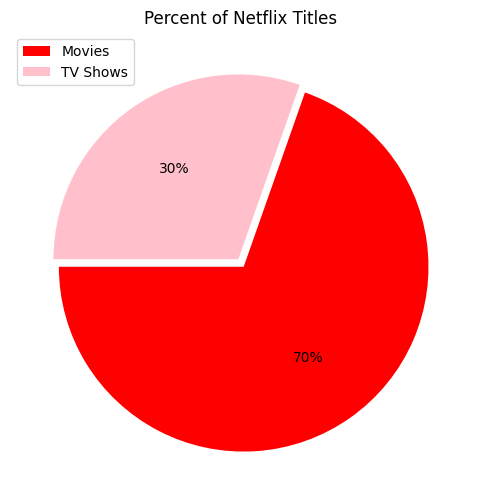

In [18]:
my_labels = ('Movies','TV Shows')

ax = df['type'].value_counts().plot(kind='pie', figsize=(12,6), autopct='%2.0f%%', explode=(0.025,0.025), labels=None, colors = ['red', 'pink'],
                                title='Percent of Netflix Titles', startangle=180)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=2, labels=my_labels)

# Rating distribution?

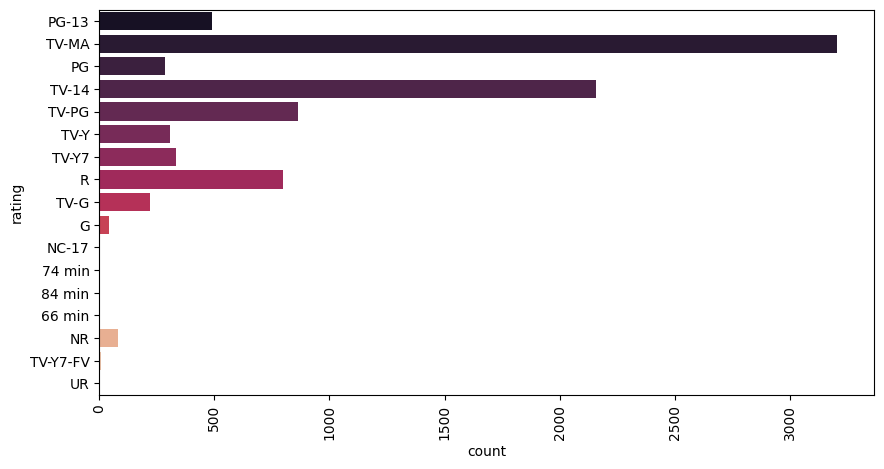

In [66]:
a,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df, y="rating",palette="rocket",ax=ax)
plt.xticks(rotation=90)
plt.show()

# How much content is available per country?

In [19]:
split_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True) 

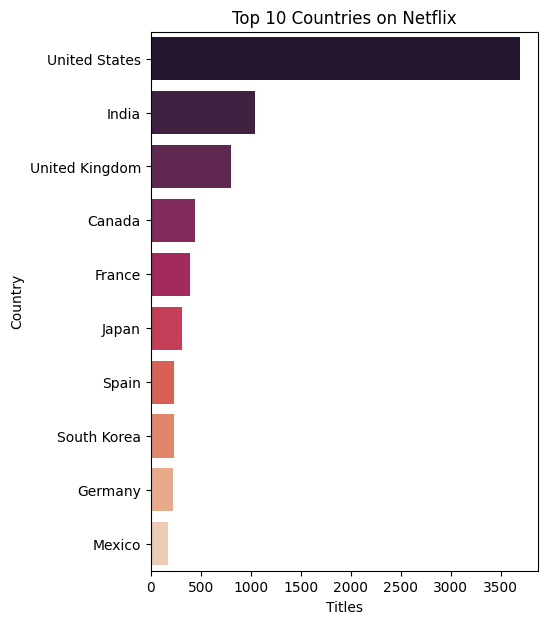

In [21]:
plt.figure(figsize=(5,7))
g = sns.countplot(y = split_countries, order=split_countries.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

# Category distribution?
# Movies vs shows?

In [22]:
split_category = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True) 

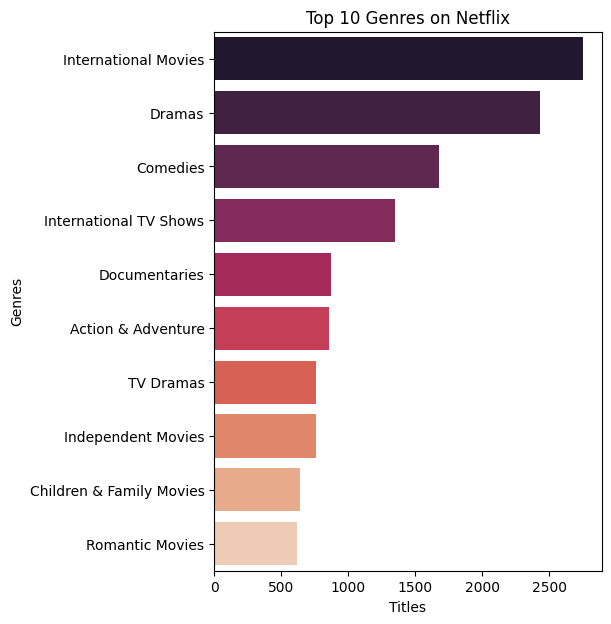

In [23]:
plt.figure(figsize=(5,7))
g = sns.countplot(y = split_category, order=split_category.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [26]:
moviesplit_category = df[movies].set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True) 

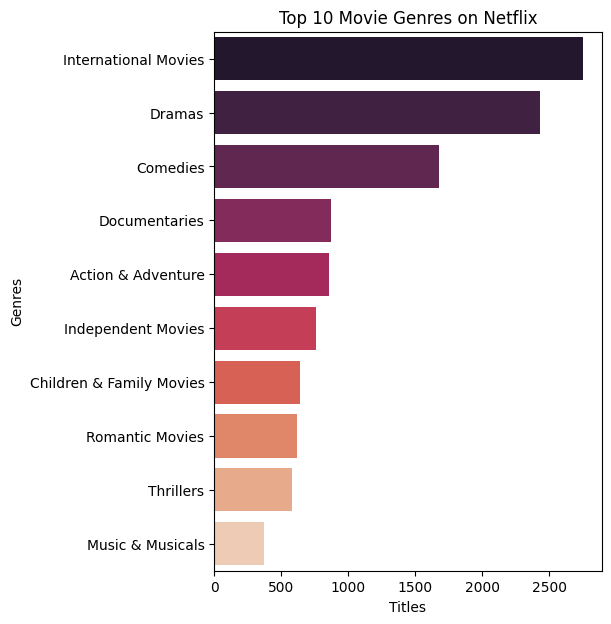

In [27]:
plt.figure(figsize=(5,7))
g = sns.countplot(y = moviesplit_category, order=moviesplit_category.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Movie Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [28]:
tvsplit_category = df[shows].set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True) 

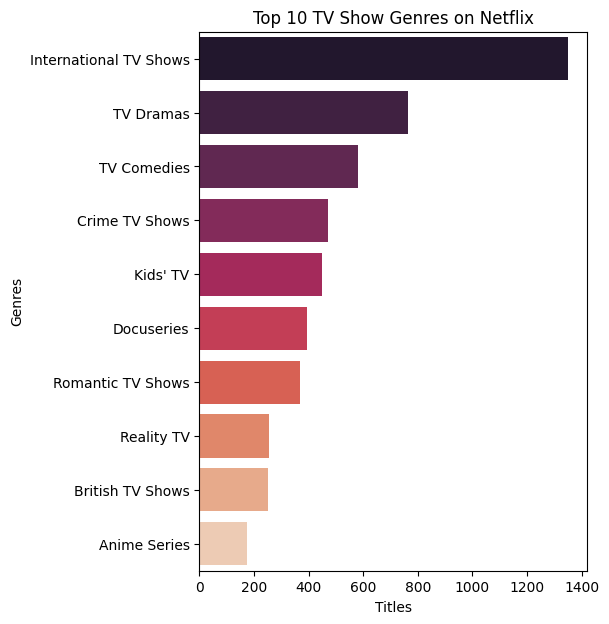

In [29]:
plt.figure(figsize=(5,7))
g = sns.countplot(y = tvsplit_category, order=tvsplit_category.value_counts().index[:10], palette='rocket')
plt.title('Top 10 TV Show Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [30]:

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i  
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Correlations in Genre', fontfamily='serif',fontsize=15)
    pl = sns.heatmap(corr, mask=mask, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

C:\Users\Liberty\AppData\Local\Temp\ipykernel_26320\2706010676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
C:\Users\Liberty\AppData\Local\Temp\ipykernel_26320\2706010676.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


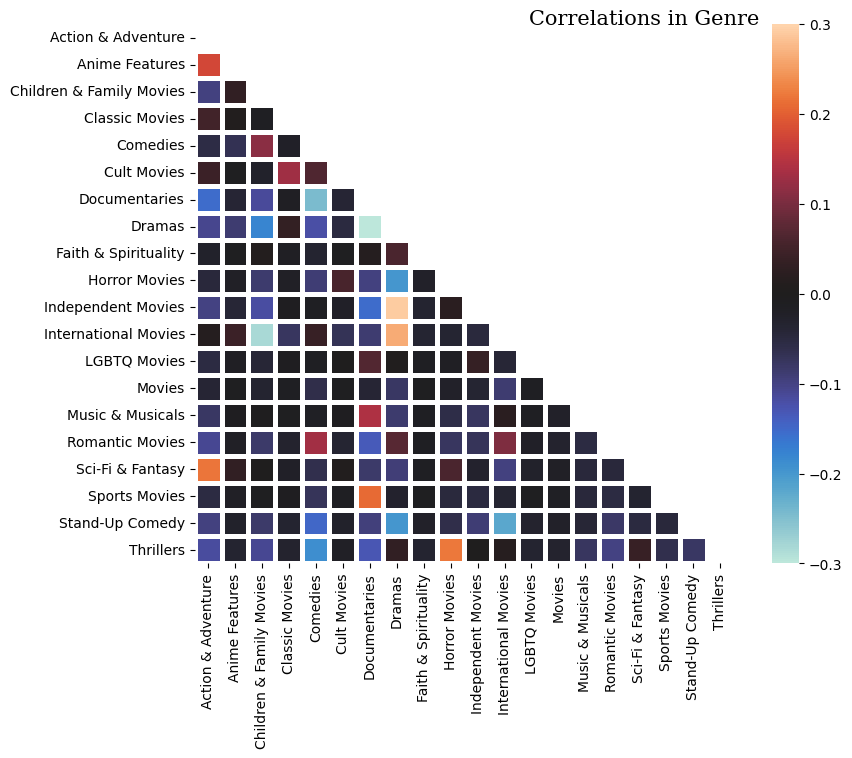

In [31]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

genre_heatmap(df_movies, 'Movie')
plt.show()

# Directors/Actors with most available content?

In [32]:
split_director = df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True) 

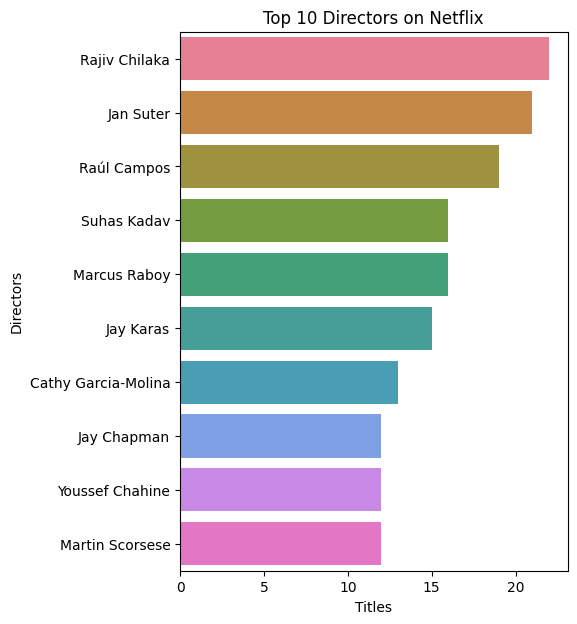

In [33]:
plt.figure(figsize=(5,7))
g = sns.countplot(y = split_director, order=split_director.value_counts().index[:10], palette='husl')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Titles')
plt.ylabel('Directors')
plt.show()

In [34]:
split_cast = df.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True) 

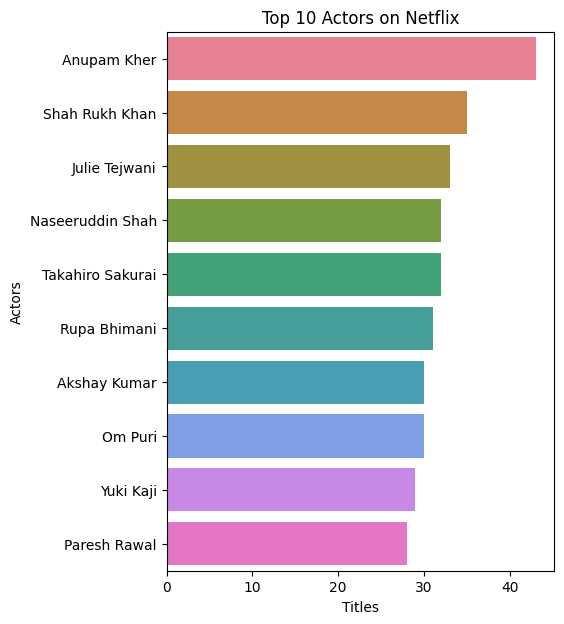

In [35]:
plt.figure(figsize=(5,7))
g = sns.countplot(y = split_cast, order=split_cast.value_counts().index[:10], palette='husl')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Titles')
plt.ylabel('Actors')
plt.show()

# Amount of shows/movies uploaded in last few years?

In [54]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

In [55]:
netflix_year = df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2021]


netflix_year2 = df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2021]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2021]

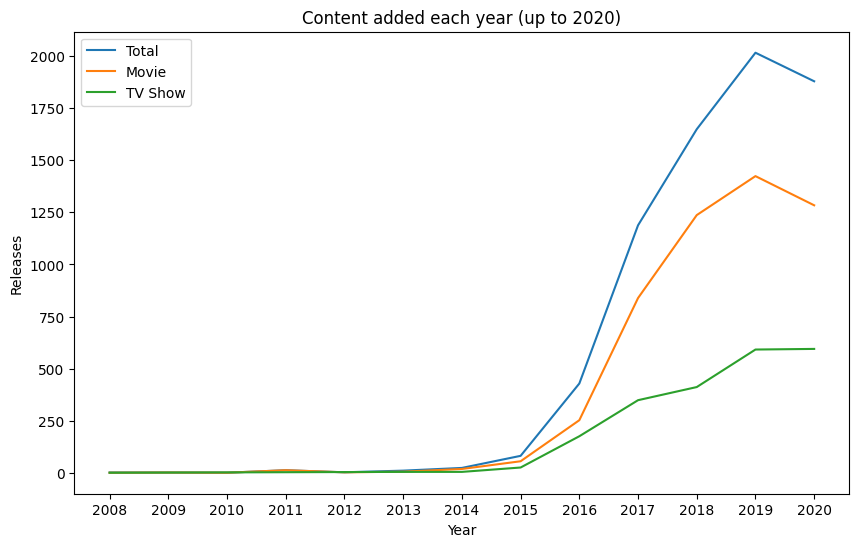

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Content added each year (up to 2020)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

# How much content is added per month?
# Would that look different? Tell us anything interesting?

In [68]:
date = df[["date_added"]].dropna()

date['year'] = date["date_added"].apply(lambda i: i.split(', ')[1])
date['month'] = date["date_added"].apply(lambda i: i.lstrip().split(' ')[0])

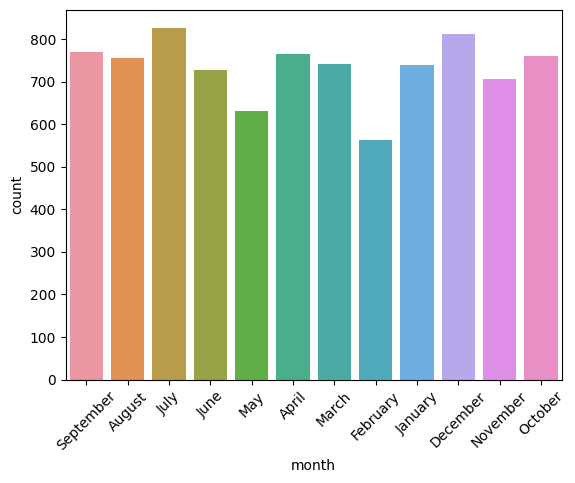

In [69]:
plt.xticks(rotation=45)
sns.countplot(x=date["month"])
plt.show()

# Insights

We can see that Netflix offers far more movies than TV shows. Most of the content available is suitable for adults with a significant portion also suitable for teen audiences. They are limited in what they offer children and younger audiences. If someone were looking for a platform specifically to cater to their young children, Netflix might not be the best choice for them. 

Most content is being produced by the United States by a huge margin. This is most surprising when taking into considering that international titles lead the charge for most content available on Netflix, followed by dramas and comedies for both movies and TV shows. 

When looking at correlations in genre we see that most international and independent movies are dramas, that most documentaries are sports movies, and that there's a large amount of action & adventure content is also sci-fi & fantasy or anime. On the opposite side of the spectrum we see that stand up comedies are rarely also labeled as comedies and that international movies are rarely if ever also suitable for children. 

Most of the top directors and actors are from India when analyzing number of films participated in.

Year over year Netflix continued to add more content to their platform. There's a peek in 2019 with a substancial dip in 2020. This is most likely attributed to the COVID 19 pandemic leading to the shut down of productions that were already underway and the prevention of new projects cropping up. Most content seems to added in July and Decmeber. We can speculate this is because people are more likely to have time off or take vacations during these months. 

Ultimately, Netflix seems to be a good choice for adults or families with children aged teen and above, particularly those with an interest in international movies, dramas, and comedies. Potential subscribers can look forward to extra content being added around July and December, offering them more to watch during the times when they'll have more time to enjoy it. 